In [1]:
!pip install pandas
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162994 sha256=ecfd8ed30dba986592161d2121664febeffd74dcc77c30e09a65ee1ae8d18acb
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from collections import defaultdict

In [3]:
# Load datasets
links_df = pd.read_csv('links.csv')
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
tags_df = pd.read_csv('tags.csv')

In [4]:

# Merge movies with ratings
movie_ratings_df = pd.merge(movies_df, ratings_df, on='movieId')

In [5]:

# Define the Reader object
reader = Reader(rating_scale=(1, 5))

In [6]:
# Load the dataset
data = Dataset.load_from_df(movie_ratings_df[['userId', 'movieId', 'rating']], reader)

# Split the dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)


In [7]:
# Train the SVD algorithm on the trainset
algo = SVD()
algo.fit(trainset)

# Make predictions on the testset
predictions = algo.test(testset)

# Create a dictionary to store the ground truth ratings for each user
true_ratings = defaultdict(list)
for userId, movieId, true_rating in testset:
    true_ratings[userId].append((movieId, true_rating))

In [8]:
# Calculate precision and recall
k = 10  # Top-k recommendations
precision_sum = 0
recall_sum = 0
for userId in true_ratings:
    # Get top-k recommendations for the user
    user_top_k = sorted(predictions, key=lambda x: x.est, reverse=True)[:k]
    user_top_k_movieIds = [pred.iid for pred in user_top_k]
    relevant_items = sum(1 for (movieId, _) in true_ratings[userId] if movieId in user_top_k_movieIds)
    precision_sum += relevant_items / k
    recall_sum += relevant_items / len(true_ratings[userId])

precision = precision_sum / len(true_ratings)
recall = recall_sum / len(true_ratings)

print(f'Precision@{k}: {precision}')
print(f'Recall@{k}: {recall}')

Precision@10: 0.05287356321839093
Recall@10: 0.027710033772782576


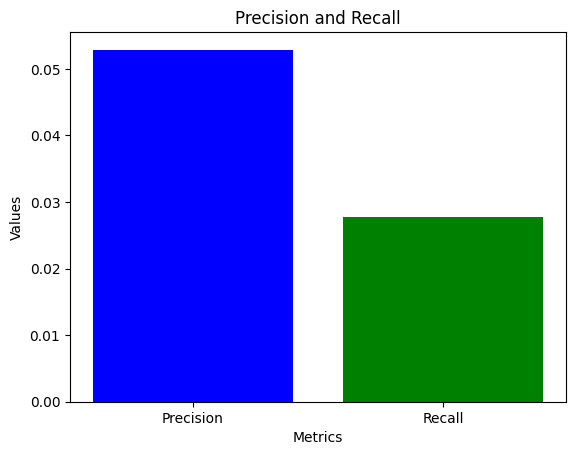

In [10]:
import matplotlib.pyplot as plt

# Plot bar graph for precision and recall
labels = ['Precision', 'Recall']
values = [precision, recall]

plt.bar(labels, values, color=['blue', 'green'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Precision and Recall')
plt.show()